<a href="https://colab.research.google.com/github/saddarudin/google_colab/blob/main/GenAI_LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Package Requirements

In [1]:
!pip -q install openai langchain huggingface_hub --quiet
!pip install cohere --quiet
!pip install yfinance --quiet
!pip install -U langchain-openai --quiet
!pip install pytesseract --quiet
!pip install Pillow --quiet
!pip install tesseract --quiet
!apt install tesseract-ocr --quiet
!apt install libtesseract-dev --quiet
!pip install -U langchain_cohere
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Reading package lists...
Building dependency tree...
Reading state information...
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libarchive-dev libleptonica-dev
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 3,743 kB of archives.
After this operation, 16.0 MB of additional disk space will be used.
G

In [2]:
from langchain.llms import OpenAI
from langchain.llms import HuggingFaceHub
from langchain_community.llms import Cohere
from langchain import PromptTemplate
from langchain import LLMChain
from langchain.chains import SequentialChain
import yfinance as yf
import pytesseract
from PIL import Image
from IPython.display import Image as display_image

## API KEYS

In [3]:
import os
from google.colab import userdata
os.environ['HUGGINGFACEHUB_API_TOKEN'] = userdata.get("HUGGINGFACEHUB_API_TOKEN")
os.environ['COHERE_API_KEY'] = userdata.get("COHERE_API_KEY")

##LLMS

###Cohere-Free alternative of OpenAI

In [4]:
from langchain_cohere import ChatCohere
llm = ChatCohere(model="command-nightly")
response = llm.invoke("Write a 4 line poem on AI")
print(response.content)

Silent minds, yet vast and wide,
In circuits deep, where thoughts reside,
Learning, growing, never to hide,
AI's whisper, the future's guide.


In [5]:
from langchain.llms import Cohere
llm = Cohere(temperature=0.9)
response = llm.invoke("Write a 4 line poem on AI")
print(response)

/tmp/ipython-input-5-2396777412.py:2: LangChainDeprecationWarning: The class `Cohere` was deprecated in LangChain 0.1.14 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-cohere package and should be used instead. To use it run `pip install -U :class:`~langchain-cohere` and import as `from :class:`~langchain_cohere import Cohere``.
  llm = Cohere(temperature=0.9)


 AI, oh AI, you're such a mystery
A challenge, a curiosity, for dissecting eyes.
Advancing discovery, and evolving stealthily
Solving puzzles, thus creating new vistas! 


### To control the prompt so that output behaviour is same to every use we can use Prompt Template

In [6]:
from langchain import PromptTemplate
template = """Question: {question}

Answer: Let's think step by step."""

prompt = PromptTemplate(template=template, input_variables=["question"])

In [7]:
print(prompt.format(question="What is the capital of Sindh, the province of Pakistan?"))

Question: What is the capital of Sindh, the province of Pakistan?

Answer: Let's think step by step.


In [8]:
template = "Write a 4 line poem on the subject {subject_name}"
prompt = PromptTemplate(
    input_variables=['subject_name'],
    template=template

)
print(prompt.format(subject_name="Mother's Day"))
print(prompt.format(subject_name="Father's Day"))
print(prompt.format(subject_name="Data Science"))

Write a 4 line poem on the subject Mother's Day
Write a 4 line poem on the subject Father's Day
Write a 4 line poem on the subject Data Science


In [9]:
from langchain.llms import Cohere
from langchain import PromptTemplate
from langchain_core.runnables import RunnableSequence

In [10]:
llm = Cohere(temperature=0)
template = "List down the historical significant steps in the field of {field_name}"
prompt = PromptTemplate(
    input_variables=['field_name'],
    template=template
)

chain = prompt | llm

result = chain.invoke(input="Data Science")
print(result)

 The field of data science has evolved rapidly in recent years, and it can be challenging to identify the most significant developments. Here are some key milestones that have contributed to the field's growth and shape its current landscape:

1. Charles Darwin and Analytics: Charles Darwin is perhaps best known for his contributions to the theory of evolution, but he also laid the foundation for data science. Darwin meticulously collected and analyzed vast amounts of data from his observations and experiments. He pioneered statistical methods to uncover patterns and make predictions, establishing the essence of data-driven decision-making.

2. Sir Francis Galton and Statistics: Sir Francis Galton, a British mathematician and anthropologist, took the concept of data analysis further. He developed the field of statistics, introducing ideas such as regression and correlation to understand diverse subjects like heredity and fingerprint patterns. Galton's work established statistics as a f

In [11]:
print(chain.invoke(input='Solar System'))

 The historical significant steps in the development of our understanding of the Solar System include:

1. Ancient Observations: Our early understanding of the universe started with observations of celestial bodies. Ancient civilizations like the Egyptians, Babylonians, and the Chinese observed the motions of the Sun, Moon, and planets. They also tracked the phases of the Moon and recorded celestial events like eclipses. These early observations laid the foundation for later astronomical advancements. 

2. Galileo's Improvements to the Telescope: In the 17th century, Galileo Galilei improved the design of the telescope, which allowed for more detailed observations of the Solar System. He was among the first to view Jupiter's moons, Saturn's rings, and the Moon's craters. His work helped establish the idea of a heliocentric model versus a geocentric model, suggesting that the Earth orbits the Sun. 

3. Newton's Laws of Motion: Sir Isaac Newton formulated the laws of motion in the late 1

In [12]:
llm = Cohere(temperature=1,max_tokens=2000)
template = "The topic name is {topic_name}. Explain this topic to a 10 years old kid."

prompt = PromptTemplate(
    input_variables=['topic_name'],
    template=template
)

chain = prompt | llm

print(chain.invoke("Robotics"))

 Robotics is a very cool topic! You may have seen or heard about robots powered by batteries that can walk, move, and even pick up things. Robotics is the study of making machines that can do work or that mimic human actions. These machines are called robots. Robots can be really simple or really complicated. They look like humans, animals, or bugs, and they move around on their own. Some robots are opened and you can see inside them where there is a lot of interesting stuff that makes them move, like wheels, motors, computers, sensors, and even arms to pick things up. 

Robots have many different purposes for assisting humans in their day-to-day lives and also fun aspects such as taking part in competitions. The field of robotics incorporates multiple engineering disciplines including mechanical, electronic and electrical, and computer software fields which require maths and physics know-how. So, scientists and engineers who build robots have to learn all these subjects to make cool r

In [13]:
print(chain.invoke("Harrasment"))

 Harassment is when someone behaves in a mean and unfair way towards another person, or towards you for that matter, with the intentional aim of causing discomfort, or in more severe cases, humiliation and fear. The person harassing could be a peer, an older adult, or somebody in a position of authority, such as a teacher or a boss.

There are many different ways that someone can harass others, and it often happens through words or actions that intend to intimidate or exploit others characteeristics. Harassment can manifest in verbal form, such as name-calling, taunting, or threatening. It can also be physical, such as kicking, hitting, or improperly touching a person who has not given their consent to touch them.

Harassment can also occur via indirect behavior, such as someone manipulating or spreading rumors in order to make a person look foolish or reputation. It can be done through cheating on a person in order to make them look bad or unfairly denying them opportunities or privil

###Sequential Chains
##Chain-1 --> top ten books of {theme}
##Chain-2 --> summary of any one of the them

In [14]:
from langchain import LLMChain

In [15]:
llm = Cohere(temperature=0.5)
template = "Please provide a simple list of ten well known books that centre around the theme of: {theme}. Do not include book description"

prompt = PromptTemplate(
    input_variables = ['theme'],
    template=template
)

chain1 = LLMChain(llm=llm, prompt = prompt,output_key = "book_names_list")

books_list = chain1.invoke("personality development")
print(books_list['book_names_list'])

/tmp/ipython-input-15-3357800485.py:9: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain1 = LLMChain(llm=llm, prompt = prompt,output_key = "book_names_list")


 Here is a list of 10 well-known books that focus on the theme of personality development: 

1. "How to Win Friends and Influence People" by Dale Carnegie
2. "Atomic Habits" by James Clear
3. "The 7 Habits of Highly Effective People" by Stephen Covey
4. "Mindset: The New Psychology of Success" by Carol S. Dweck
5. "The Power of Positive Thinking" by Norman Vincent Peale
6. "How to Be an Antiracist" by Ibram X. Kendi
7. "The Road to Character" by David Brooks
8. "Man's Search For Meaning" by Viktor E. Frankl
9. "The Authenticity Project" by Clare Pooley
10. "The Happiness Advantage" by Shawn Achor

These books cover various aspects of personality development, including interpersonal skills, habit formation, mindset, positivity, self-awareness, and navigating difficult experiences. 


In [16]:
llm = Cohere(temperature=0.9,max_tokens=3000)

template = """
Take one book from the books list {book_names_list}.
Provide a comprehensive summary of the book, in three sections and each section
with three summary points.
"""

prompt = PromptTemplate(
    input_variables=['book_names_list'],
    template=template
)

chain2 = LLMChain(llm=llm, prompt=prompt,output_key='book_summary')

### Sequential Chain

In [17]:
from langchain.chains import SequentialChain

chain = SequentialChain(
    chains=[chain1,chain2],
    input_variables=['theme'],
    output_variables = ['book_names_list','book_summary']
)

result = chain.invoke(input={"theme":"Personal Development"})
result

{'theme': 'Personal Development',
 'book_names_list': ' Here is a list of ten well-known books centered around personal development: \n\n1. *The 7 Habits of Highly Effective People* by Stephen Covey\n2. *How to Win Friends and Influence People* by Dale Carnegie\n3. *Think and Grow Rich* by Napoleon Hill\n4. *The Power of Positive Thinking* by Norman Vincent Peale\n5. *The Silva Method* by Jose Silva\n6. *The Law of Success* by Napoleon Hill\n7. *Awaken the Giant Within* by Anthony Robbins\n8. *As a Man Thinketh* by James Allen\n9. *The Greatest Salesman in the World* by Og Mandino\n10. *Smarter Faster Better* by Charles Duhigg \n\nThese books explore various aspects of personal development, such as improving effectiveness, interpersonal skills, positive mindset, and psychological aspects that can enhance oneself and personal growth. \n\nLet me know if you would like further information on any of the aforementioned titles. ',
 'book_summary': " Certainly! Here is a summary of *The 7 Hab

In [18]:
print(result['book_summary'])

 Certainly! Here is a summary of *The 7 Habits of Highly Effective People* by Stephen Covey in three sections, each with three summary points: 

1. Personal Habits and Character Development:
- Habit 1: Be Proactive - Take responsibility for your life and don't blame external factors or other people for your circumstances. 
- Habit 2: Begin with the End in Mind - Define your life goals and develop a strategic plan to achieve them. 
- Habit 3: Put First Things First - Prioritize your tasks and manage your time effectively to ensure alignment with your goals. 

2. Interpersonal Skills and Relationships:
- Habit 4: Think Win-Win - Pursue agreements and relationships that are mutually beneficial. 
- Habit 5: Seek First to Understand, Then to Be Understood - Effective communication involves actively listening to others and seeking to understand their perspectives before expressing your own. 
- Habit 6: Synergize - Value the power of creative cooperation, finding win-win opportunities, and ac

In [19]:
result = chain.invoke(input={"theme":"Geography"})
print(result['book_summary'])

 Here is a summary of the novel "The World in Miniature" by Stephen S. Hall, in three sections, each with three summary points:

Section 1: 
1. "The World in Miniature" presents an in-depth exploration of the science and history of the little things in our world. From the microscopic to the nanoscale, the book delves into the fascinating truths and secrets that exist beyond what we can see and perceive with our senses. 
2. The author, Stephen S. Hall, demonstrates a meticulous pursuit of knowledge through research and interviews with experts. He explores the field of miniaturization, the behind-the-scenes efforts and innovation in realizing miniaturized technologies, and exemplifies some of their real-life applications. 
3. The first section emphasizes the profound impact and implications of miniaturization on our modern world, highlighting the importance of scale in our understanding of the world around us. 

Section 2:
1. Stephen S. Hall explores the influence of diminishing sizes on

In [20]:
SBIN_Stock_Analysis = """

Company name is State Bank of India
NSE Symbol is SBIN
MARKET CAP - ₹ 6,69,078.16 Cr.
Company has a good Return on Equity (ROE) track record: 3 Years ROE 13.46%.
CASA stands at 42.67% of total deposits.
The company has delivered good Profit growth of 51.35% over the past 3 years.
Company has delivered good profit growth of 76.1% CAGR over last 5 years.
Company has been maintaining a healthy dividend payout of 17.3%.
Company's working capital requirements have reduced from 152 days to 118 days
The bank has a very low ROA track record. Average ROA of 3 years is 0.70%.
Low other Income proportion of 11.03%.High Cost to income ratio of 53.87%.
Company has low interest coverage ratio.
The company has delivered a poor sales growth of 8.91% over past five years.
Company has a low return on equity of 12.8% over last 3 years.
Contingent liabilities of Rs.19,00,096 Cr.
Company might be capitalizing the interest cost.
Earnings include an other income of Rs.1,39,611 Cr.

"""
print(SBIN_Stock_Analysis)



Company name is State Bank of India
NSE Symbol is SBIN
MARKET CAP - ₹ 6,69,078.16 Cr.
Company has a good Return on Equity (ROE) track record: 3 Years ROE 13.46%.
CASA stands at 42.67% of total deposits.
The company has delivered good Profit growth of 51.35% over the past 3 years.
Company has delivered good profit growth of 76.1% CAGR over last 5 years.
Company has been maintaining a healthy dividend payout of 17.3%.
Company's working capital requirements have reduced from 152 days to 118 days
The bank has a very low ROA track record. Average ROA of 3 years is 0.70%.
Low other Income proportion of 11.03%.High Cost to income ratio of 53.87%.
Company has low interest coverage ratio.
The company has delivered a poor sales growth of 8.91% over past five years.
Company has a low return on equity of 12.8% over last 3 years.
Contingent liabilities of Rs.19,00,096 Cr.
Company might be capitalizing the interest cost.
Earnings include an other income of Rs.1,39,611 Cr.




##Chain-1 Positives and Negatives

In [21]:
llm=Cohere(temperature=0, max_tokens=256)

template ="""Read the text data from {stock_analysis_input}.
              Mention the company name and market capital.
              Write top 3 positive and top 3 negative points.
              Keep the points short"""

information_extraction_prompt = PromptTemplate(
    input_variables=["stock_analysis_input"],
    template=template,
)


information_extraction_chain=LLMChain( llm=llm,
                                       prompt=information_extraction_prompt,
                                       output_key="Pros_and_Cons")

result=information_extraction_chain.invoke(SBIN_Stock_Analysis)

print(result['Pros_and_Cons'])

 Company Name: State Bank of India
Market Capital: ₹ 6,69,078.16 Cr. 

Top 3 Positive Points about the Company:
1. ROE track record is good, with 3 Years ROE at 13.46%.
2. CASA stands at 42.67% of total deposits.
3. Profit growth of 51.35% over the past 3 years.

Top 3 Negative Points about the Company:
1. Low ROA track record with an average of 0.70% over 3 years.
2. Low other Income proportion at 11.03%.
3. High cost-to-income ratio at 53.87%. 


##Chain-2 Investor Report

In [22]:
llm=Cohere(temperature=0, max_tokens=256)

template ="""
Imagine you've been analyzing stocks for over 15 years.
Look at the good and bad points, and see if the company can grow.
Right now, is buying shares of this company a smart move?
Take the data from {Pros_and_Cons}
"""

stock_decision_prompt = PromptTemplate(
    input_variables=["Pros_and_Cons"],
    template=template,
)

stock_decision_chain=LLMChain(llm=llm,
                              prompt=stock_decision_prompt,
                              output_key="Investor_Report")
result=stock_decision_chain.invoke(SBIN_Stock_Analysis)
print(result['Investor_Report'])

 It is difficult to recommend an outright buy on SBIN shares without examining the entire stock market and considering the individual's investment portfolio. Investing in shares is influenced by several factors which need consideration. However, given the information provided, I can offer some insight on the company's strengths and weaknesses, which may aid your decision on whether to purchase shares:

**Strengths:**
- Strong Market Capitalization: With a market cap of ₹6.69 lakh cr, SBI boasts strong capitalization figures which indicates investor confidence in the company's stability.

- Good Profit Growth: The bank has delivered impressive profit growths of 51.35% and 76.1% over the last 3 and 5 years respectively. This demonstrates the company's ability to enhance profitability.

- Healthy Dividend Payout: SBI has maintained a healthy dividend payout ratio of 17.3%. This rewards shareholders with regular income from dividends.

- CASA Dominance: SBI's CASA (Current Account & Saving

##Sequential Chain

In [23]:
full_chain=SequentialChain(chains=[information_extraction_chain, stock_decision_chain],
                           input_variables=["stock_analysis_input"],
                           output_variables=["Pros_and_Cons", "Investor_Report"])
result=full_chain.invoke(SBIN_Stock_Analysis)
print(result["Investor_Report"])

 Buying shares of State Bank of India (SBI) may be a smart move for investors who are looking for a well-established company with a strong market position in the Indian banking industry. Here's why:

1. Strong Fundamentals: SBI has a market capitalization of ₹6.69 trillion, reflecting the company's size and scale in the industry. The bank's return on equity (ROE) of 13.46% over the last three years is impressive and indicates that the company can generate decent returns for its shareholders. The company's profit growth of 51.35% over the past three years further showcases its financial strength. 

2. CASA Dominance: SBI's current account and savings account (CASA) ratio of 42.67% of total deposits is high. A strong CASA base is beneficial for banks as it typically results in lower costs of funding and provides a stable source of funds. This positions SBI well to benefit from the growing savings habits in India. 

3. Brand Reputation: SBI is a well-recognized brand in India and enjoys a

## LangChain + IDP (Intelligent Document Processing)

In [4]:
#Downloading some images for IDP
!wget https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/IDM_Datasets/Invoices/Invoice_1.png
!wget https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/IDM_Datasets/Invoices/Invoice_2.png
!wget https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/IDM_Datasets/Invoices/Invoice_3.png
!wget https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/IDM_Datasets/Invoices/Invoice_4.png

--2025-06-29 17:41:03--  https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/IDM_Datasets/Invoices/Invoice_1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292226 (285K) [image/png]
Saving to: ‘Invoice_1.png’

Invoice_1.png       100%[===================>] 285.38K  --.-KB/s    in 0.05s   

2025-06-29 17:41:03 (5.54 MB/s) - ‘Invoice_1.png’ saved [292226/292226]

--2025-06-29 17:41:03--  https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/IDM_Datasets/Invoices/Invoice_2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

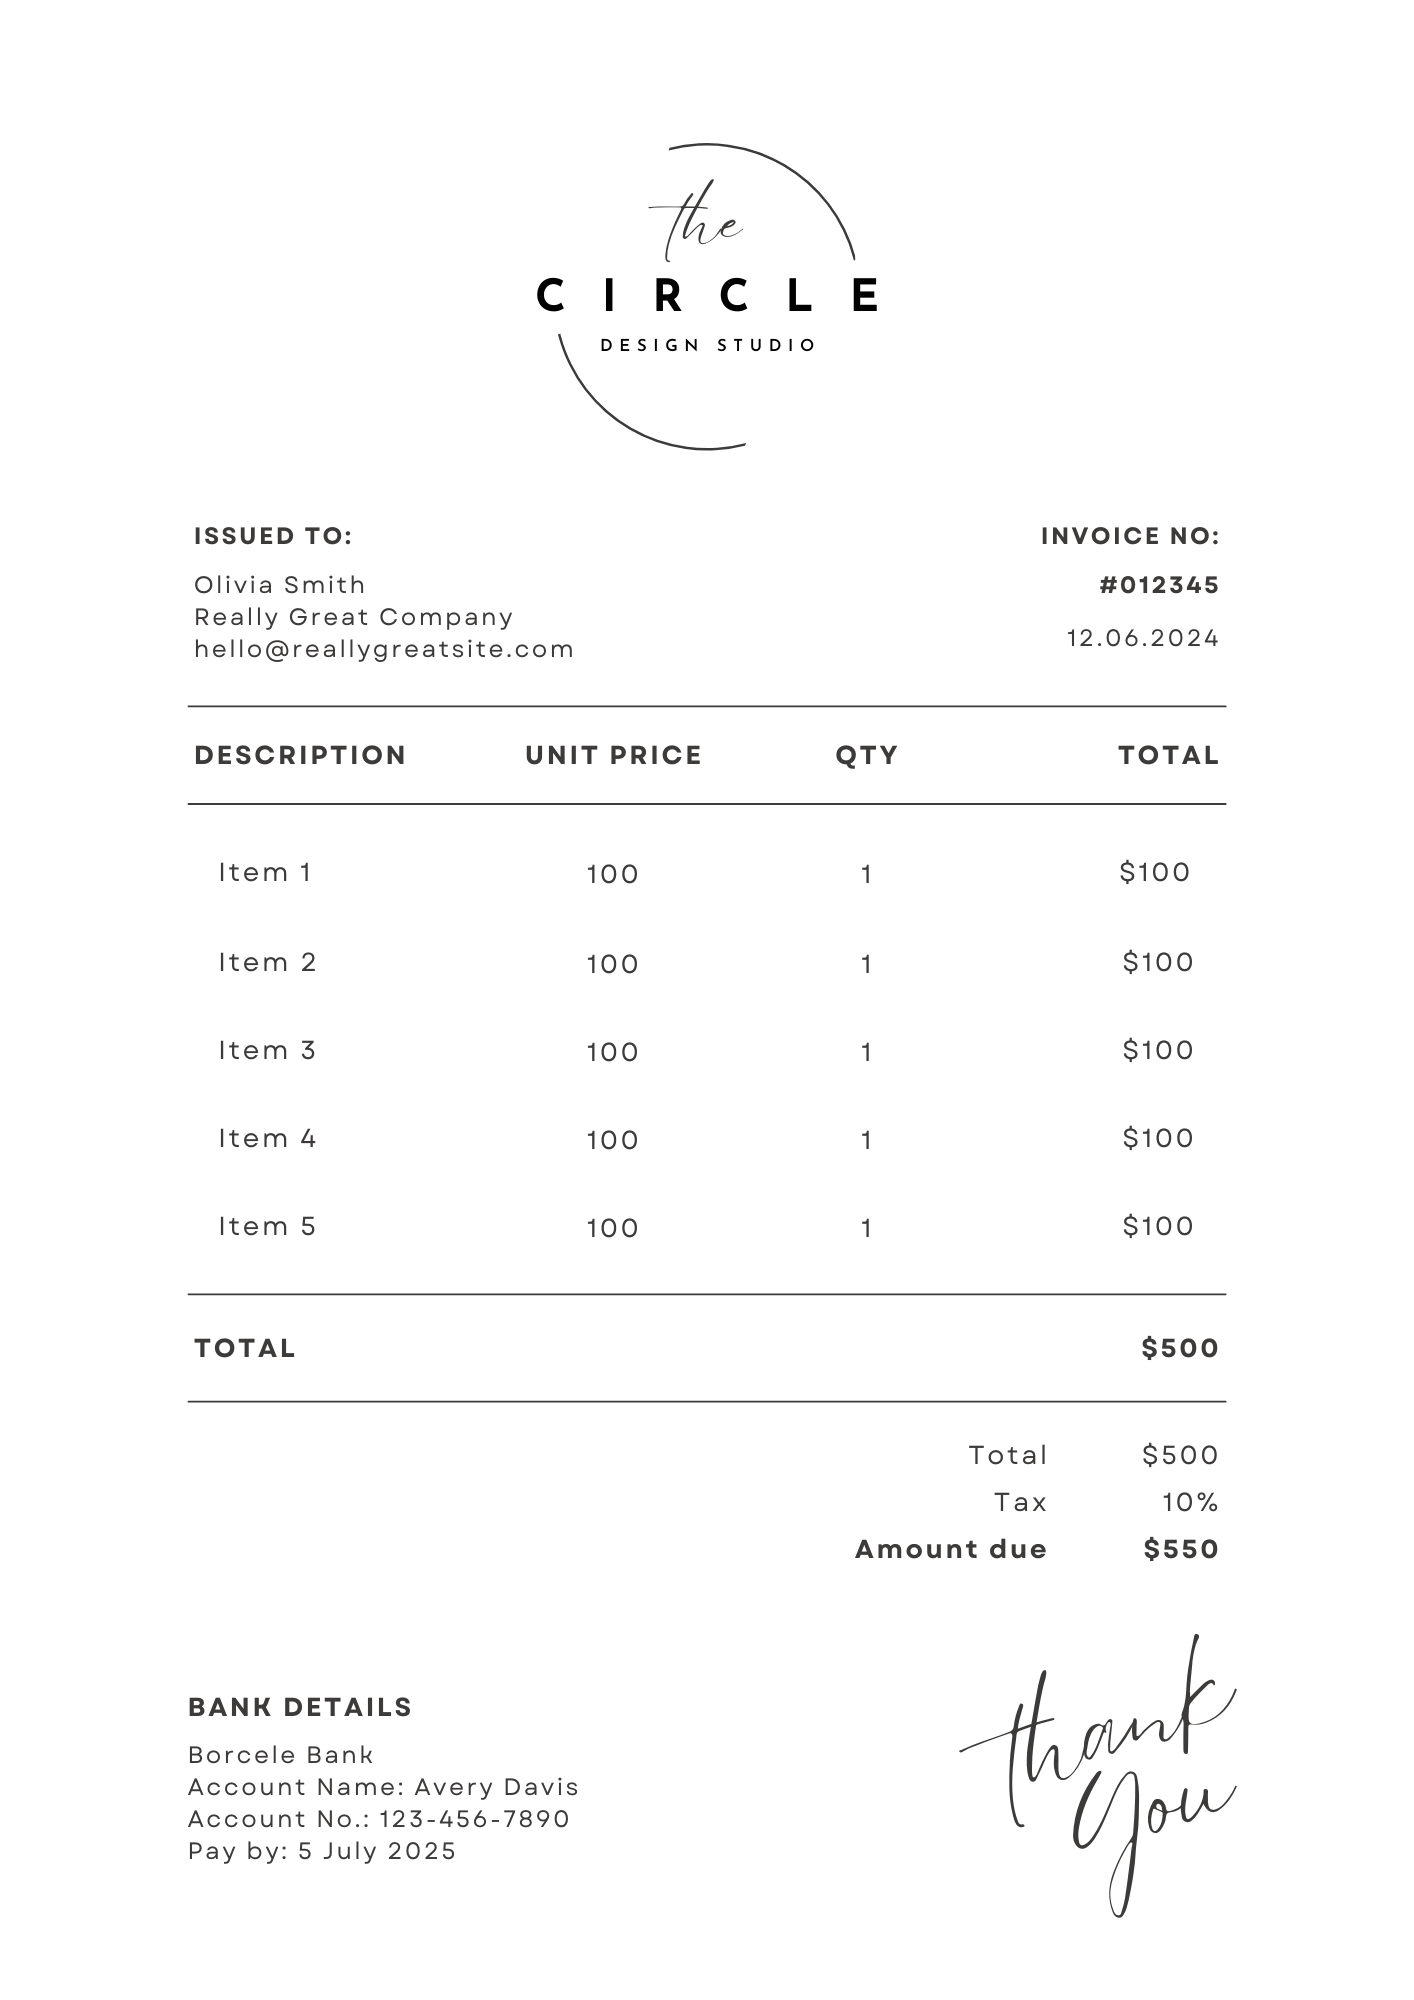

In [5]:

image_path = '/content/Invoice_4.png'
display_image(filename=image_path)

In [6]:
#Extract Text from Image
img = Image.open(image_path)
invoice_text = pytesseract.image_to_string(img)
print(invoice_text)

the

CIRCLE

DESIGN STUDIO

 

 

 

 

ISSUED TO: INVOICE NO:
Olivia Smith #012345
Really Great Company

hello@reallygreatsite.com 12.06.2024

DESCRIPTION UNIT PRICE QTY TOTAL
Item 1 100 1 $100
Item 2 100 1 $100
Item 3 100 1 $100
Item 4 100 1 $100
Item 5 100 1 $100

TOTAL $500

Total $500

Tax 10%

Amount due $550

BANK DETAILS

Borcele Bank

Account Name: Avery Davis
Account No.: 123-456-7890
Pay by: 5 July 2025

4



In [7]:
llm=Cohere(temperature=0)

template="""
Take the information from {invoice_text} and print the itemwise price and quantity.
"""

invoice_prompt = PromptTemplate(
    input_variables=["invoice_text"],
    template=template,
)

invoice_chain=LLMChain(llm=llm, prompt=invoice_prompt, output_key="itemwise_price_and_quantity")
result=invoice_chain.invoke(invoice_text)
print(result['itemwise_price_and_quantity'])

/tmp/ipython-input-7-86609151.py:1: LangChainDeprecationWarning: The class `Cohere` was deprecated in LangChain 0.1.14 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-cohere package and should be used instead. To use it run `pip install -U :class:`~langchain-cohere` and import as `from :class:`~langchain_cohere import Cohere``.
  llm=Cohere(temperature=0)
/tmp/ipython-input-7-86609151.py:12: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  invoice_chain=LLMChain(llm=llm, prompt=invoice_prompt, output_key="itemwise_price_and_quantity")


 The item-wise price and quantity are as follows: 

| Item | Price ($) | Quantity |
|---|---|---|
| 1 | 100 | 1 |
| 2 | 100 | 1 |
| 3 | 100 | 1 |
| 4 | 100 | 1 |
| 5 | 100 | 1 |


Total price is $500, and the quantity is 5. 


In [8]:
from IPython.display import display_markdown

result_values=result['itemwise_price_and_quantity']
display_markdown(result_values, raw=True)

 The item-wise price and quantity are as follows: 

| Item | Price ($) | Quantity |
|---|---|---|
| 1 | 100 | 1 |
| 2 | 100 | 1 |
| 3 | 100 | 1 |
| 4 | 100 | 1 |
| 5 | 100 | 1 |


Total price is $500, and the quantity is 5. 

In [9]:
template="""
Take the information from {invoice_text} and print the client name,phone number, email and total amout
"""

invoice_prompt = PromptTemplate(
    input_variables=["invoice_text"],
    template=template,
)

invoice_chain=LLMChain(llm=llm, prompt=invoice_prompt, output_key="contact_details")
result=invoice_chain.invoke(invoice_text)
print(result['contact_details'])

 Here is the information from the invoice issued to Olivia Smith:

Client Name:  Olivia Smith

Phone Number: N/A

Email: hello@reallygreatsite.com

Total Amount: $550 

Please note that the phone number was not listed in the provided information, and the total amount includes 10% tax as per the details on the invoice. 

Let me know if there is anything else I can help you with regarding the provided invoice. 


In [10]:
template="""
Take the information from {invoice_text} and print the bank account number and payment conditions
"""

invoice_prompt = PromptTemplate(
    input_variables=["invoice_text"],
    template=template,
)

invoice_chain=LLMChain(llm=llm, prompt=invoice_prompt, output_key="bank_details")
result=invoice_chain.invoke(invoice_text)
print(result['bank_details'])

 Bank Account Number: 123-456-7890

Payment Conditions: Payment is due by 5 July 2025. 

Would you like me to generate an invoice based on this template you've provided? 
